In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('osteoporosis.csv')
df.head()

Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0  104866   69  Female           Normal            Yes             Asian   
1  101999   32  Female           Normal            Yes             Asian   
2  106567   89  Female   Postmenopausal             No         Caucasian   
3  102316   78  Female           Normal             No         Caucasian   
4  101944   38    Male   Postmenopausal            Yes  African American   

   Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0  Underweight            Low       Sufficient         Sedentary     Yes   
1  Underweight            Low       Sufficient         Sedentary      No   
2       Normal       Adequate       Sufficient            Active      No   
3  Underweight       Adequate     Insufficient         Sedentary     Yes   
4       Normal            Low       Sufficient            Active     Yes   

  Alcohol Consumption    Medical Conditions      Medications Prior Fractures  \
0            Moderate  Rheumatoid Arthritis  Corticosteroids             Yes   
1                 NaN                   NaN              NaN             Yes   
2            Moderate       Hyperthyroidism  Corticosteroids              No   
3                 NaN  Rheumatoid Arthritis  Corticosteroids              No   
4                 NaN  Rheumatoid Arthritis              NaN             Yes   

   Osteoporosis  
0             1  
1             1  
2             1  
3             1  
4             1

In [3]:
df.shape

(1958, 16)

In [4]:
df.info

<bound method DataFrame.info of           Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0     104866   69  Female           Normal            Yes             Asian   
1     101999   32  Female           Normal            Yes             Asian   
2     106567   89  Female   Postmenopausal             No         Caucasian   
3     102316   78  Female           Normal             No         Caucasian   
4     101944   38    Male   Postmenopausal            Yes  African American   
...      ...  ...     ...              ...            ...               ...   
1953  106130   19  Female           Normal            Yes  African American   
1954  106463   23  Female   Postmenopausal            Yes         Caucasian   
1955  103142   34  Female   Postmenopausal             No  African American   
1956  105187   25    Male   Postmenopausal             No  African American   
1957  108561   26  Female   Postmenopausal             No  African American   

      Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0     Underweight            Low       Sufficient         Sedentary     Yes   
1     Underweight            Low       Sufficient         Sedentary      No   
2          Normal       Adequate       Sufficient            Active      No   
3     Underweight       Adequate     Insufficient         Sedentary     Yes   
4          Normal            Low       Sufficient            Active     Yes   
...           ...            ...              ...               ...     ...   
1953       Normal       Adequate       Sufficient         Sedentary     Yes   
1954  Underweight            Low     Insufficient            Active      No   
1955  Underweight            Low       Sufficient         Sedentary      No   
1956       Normal            Low     Insufficient         Sedentary     Yes   
1957  Underweight       Adequate       Sufficient         Sedentary     Yes   

     Alcohol Consumption    Medical Conditions      Medications  \
0               Moderate  Rheumatoid Arthritis  Corticosteroids   
1                    NaN                   NaN              NaN   
2               Moderate       Hyperthyroidism  Corticosteroids   
3                    NaN  Rheumatoid Arthritis  Corticosteroids   
4                    NaN  Rheumatoid Arthritis              NaN   
...                  ...                   ...              ...   
1953            Moderate  Rheumatoid Arthritis              NaN   
1954                 NaN                   NaN  Corticosteroids   
1955                 NaN       Hyperthyroidism              NaN   
1956                 NaN  Rheumatoid Arthritis  Corticosteroids   
1957                 NaN  Rheumatoid Arthritis  Corticosteroids   

     Prior Fractures  Osteoporosis  
0                Yes             1  
1                Yes             1  
2                 No             1  
3                 No             1  
4                Yes             1  
...              ...           ...  
1953             Yes             0  
1954              No             0  
1955              No             0  
1956             Yes             0  
1957              No             0  

[1958 rows x 16 columns]>

In [5]:
colums_with_missing_values = df.columns[df.isnull().any()]

print('Missing values percentage ')
for columns in colums_with_missing_values:
    print(columns,':',df[columns].isnull().sum()/df.shape[0]*100)

Missing values percentage 
Alcohol Consumption : 50.45965270684371
Medical Conditions : 33.04392236976506
Medications : 50.30643513789581


In [6]:
df.fillna('None',inplace=True)

In [7]:
df = df.drop(['Id'], axis=1)

In [8]:
categorical_colums = df.select_dtypes(include=['object']).columns
for columns in categorical_colums:
    print(df[columns].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
None               985
Corticosteroids    973
Name: count, dtype: int64
Prior Fract

In [9]:
df.describe()

Age  Osteoporosis
count  1958.000000   1958.000000
mean     39.101124      0.500000
std      21.355424      0.500128
min      18.000000      0.000000
25%      21.000000      0.000000
50%      32.000000      0.500000
75%      53.000000      1.000000
max      90.000000      1.000000

In [10]:
df.head()

Age  Gender Hormonal Changes Family History    Race/Ethnicity  Body Weight  \
0   69  Female           Normal            Yes             Asian  Underweight   
1   32  Female           Normal            Yes             Asian  Underweight   
2   89  Female   Postmenopausal             No         Caucasian       Normal   
3   78  Female           Normal             No         Caucasian  Underweight   
4   38    Male   Postmenopausal            Yes  African American       Normal   

  Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0            Low       Sufficient         Sedentary     Yes   
1            Low       Sufficient         Sedentary      No   
2       Adequate       Sufficient            Active      No   
3       Adequate     Insufficient         Sedentary     Yes   
4            Low       Sufficient            Active     Yes   

  Alcohol Consumption    Medical Conditions      Medications Prior Fractures  \
0            Moderate  Rheumatoid Arthritis  Corticosteroids             Yes   
1                None                  None             None             Yes   
2            Moderate       Hyperthyroidism  Corticosteroids              No   
3                None  Rheumatoid Arthritis  Corticosteroids              No   
4                None  Rheumatoid Arthritis             None             Yes   

   Osteoporosis  
0             1  
1             1  
2             1  
3             1  
4             1

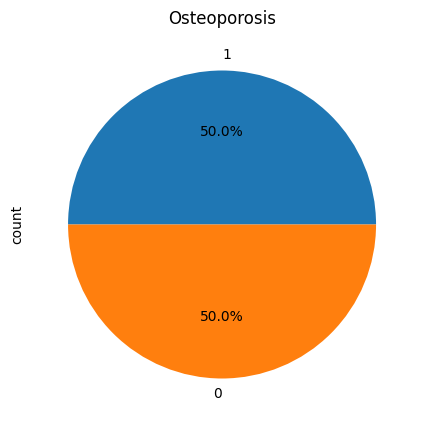

In [11]:
plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteoporosis');

Text(0, 0.5, 'Osteoporosis by Age')

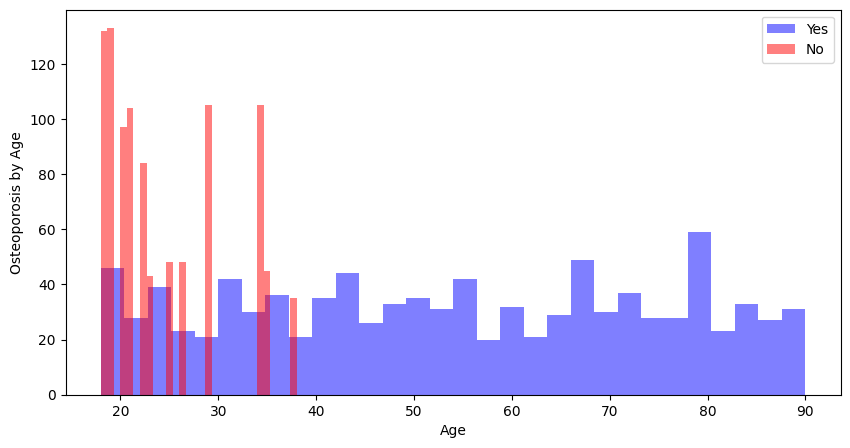

In [12]:
plt.figure(figsize=(10,5))
df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha=0.5, color='blue', label='Yes')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha=0.5, color='red', label='No')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Osteoporosis by Age')

Text(0.5, 1.0, 'Gender vs Osteoporosis')

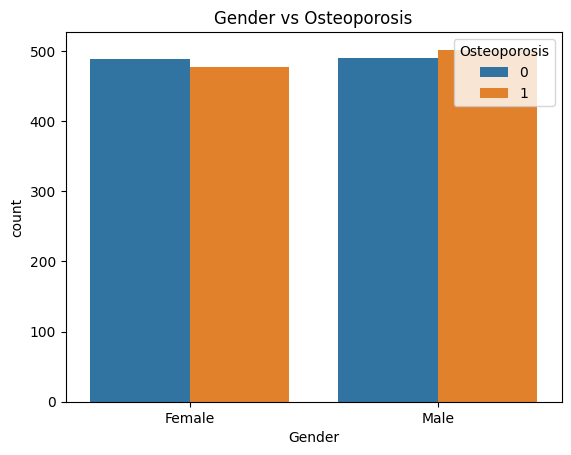

In [13]:
sns.countplot(x='Gender', data=df, hue='Osteoporosis').set_title('Gender vs Osteoporosis')

Text(0.5, 1.0, 'Hormonal Changes vs Osteoporosis')

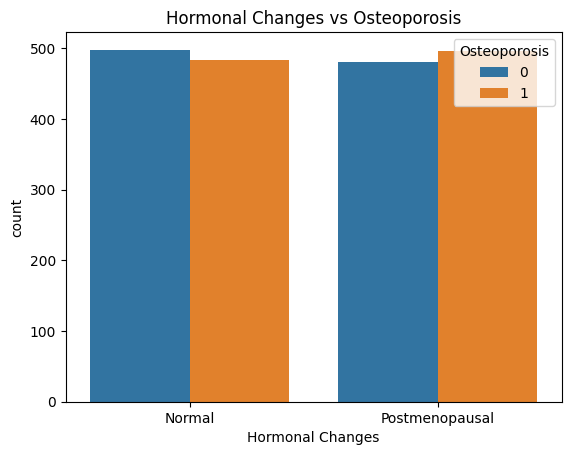

In [14]:
sns.countplot(x='Hormonal Changes', data=df, hue='Osteoporosis').set_title('Hormonal Changes vs Osteoporosis')

Text(0.5, 1.0, 'Family History vs Osteoporosis')

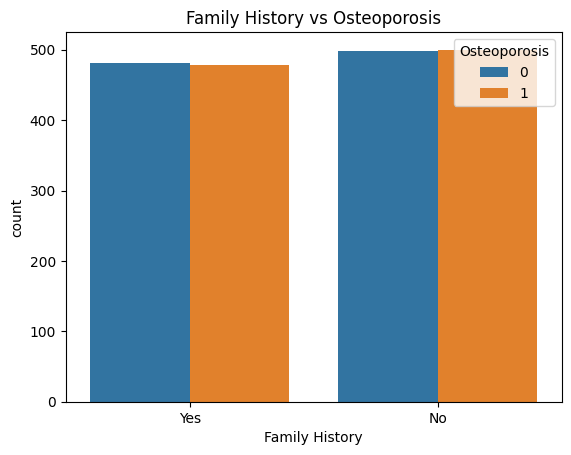

In [15]:
sns.countplot(x='Family History', data=df, hue='Osteoporosis').set_title('Family History vs Osteoporosis')

Text(0.5, 1.0, 'Race/Ethnicity vs Osteoporosis')

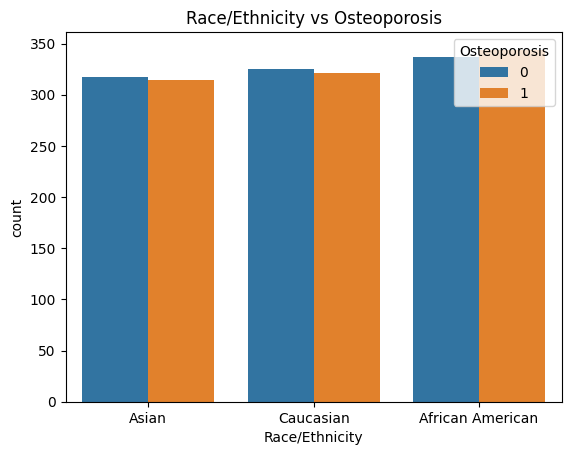

In [16]:
sns.countplot(x='Race/Ethnicity', data=df, hue='Osteoporosis').set_title('Race/Ethnicity vs Osteoporosis')

Text(0.5, 1.0, 'Body Weighty vs Osteoporosis')

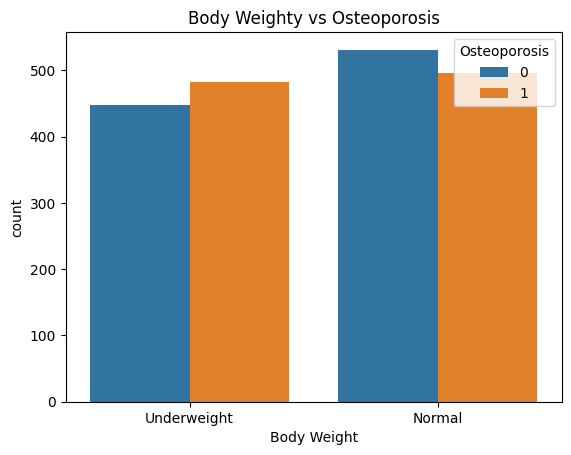

In [17]:
sns.countplot(x='Body Weight', data=df, hue='Osteoporosis').set_title('Body Weighty vs Osteoporosis')

Text(0.5, 1.0, 'Vitamin D Intake and Osteoporosis')

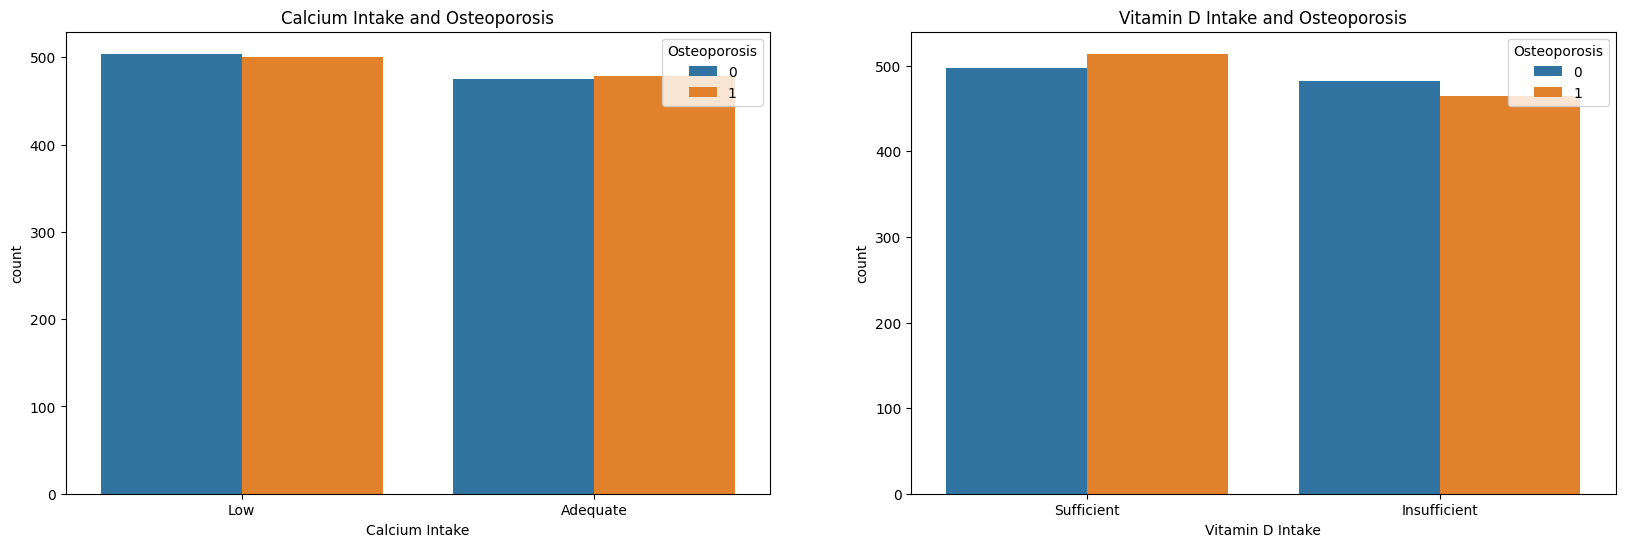

In [18]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Calcium Intake', data=df , ax=ax[0], hue='Osteoporosis').set_title('Calcium Intake and Osteoporosis')
sns.countplot(x='Vitamin D Intake', data=df , ax=ax[1], hue='Osteoporosis').set_title('Vitamin D Intake and Osteoporosis')

Text(0.5, 1.0, 'Physical Activity vs Osteoporosis')

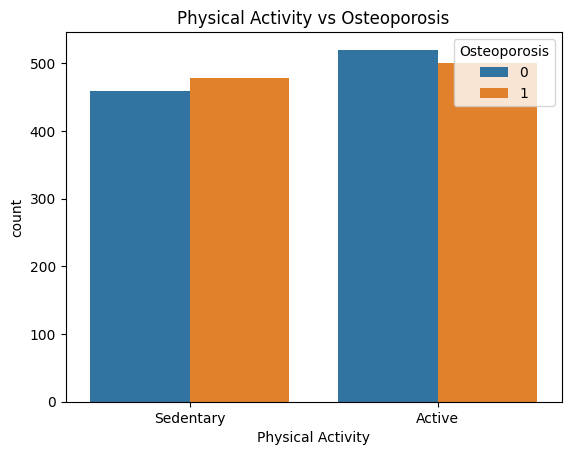

In [19]:
sns.countplot(x='Physical Activity', data=df, hue='Osteoporosis').set_title('Physical Activity vs Osteoporosis')

Text(0.5, 1.0, 'Alcohol Consumption and Osteoporosis')

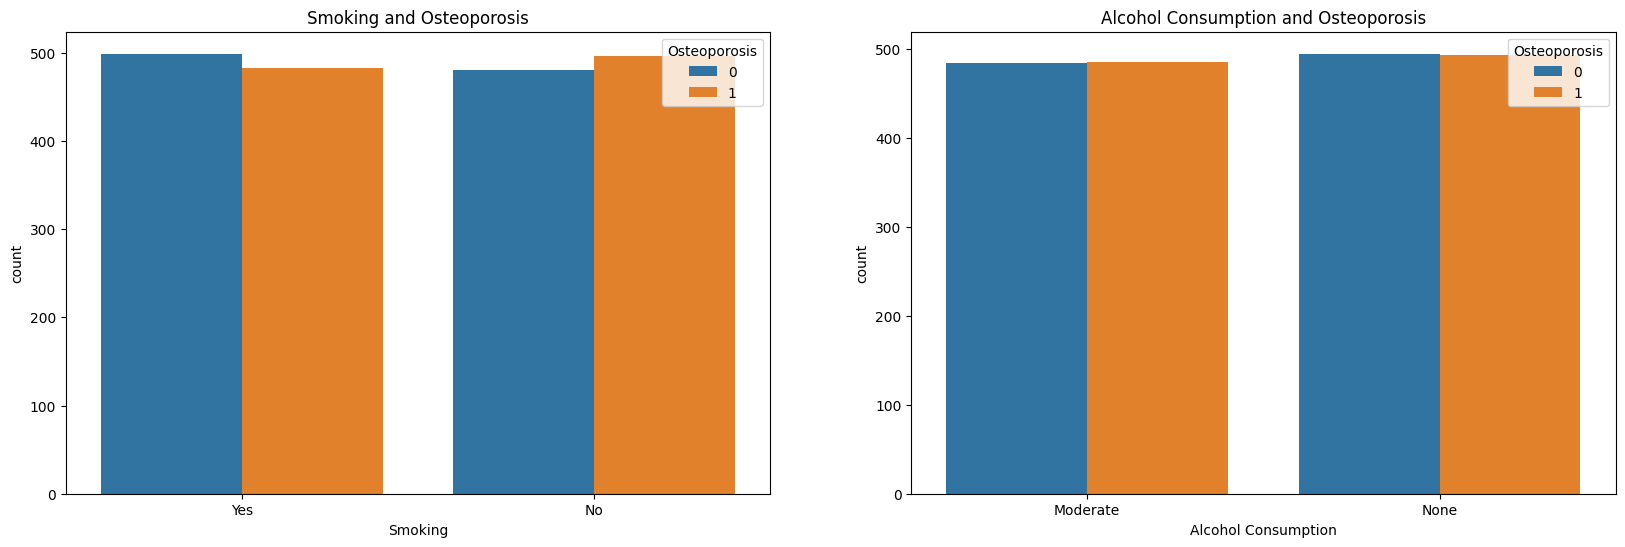

In [20]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Smoking', data=df , ax=ax[0], hue='Osteoporosis').set_title('Smoking and Osteoporosis')
sns.countplot(x='Alcohol Consumption', data=df , ax=ax[1], hue='Osteoporosis').set_title('Alcohol Consumption and Osteoporosis')

Text(0.5, 1.0, 'Medications  and Osteoporosis')

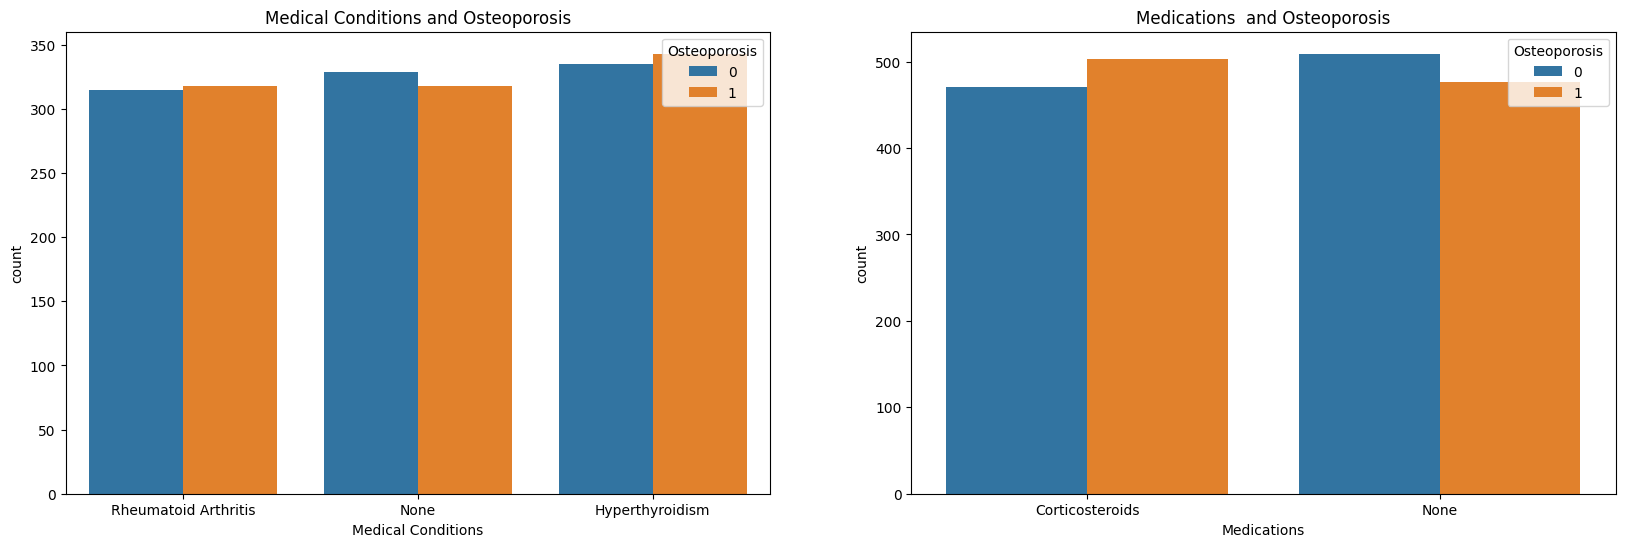

In [21]:
fig,ax =plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Medical Conditions', data=df , ax=ax[0], hue='Osteoporosis').set_title('Medical Conditions and Osteoporosis')
sns.countplot(x='Medications', data=df , ax=ax[1], hue='Osteoporosis').set_title('Medications  and Osteoporosis')

Text(0.5, 1.0, 'Prior Fractures \t vs Osteoporosis')

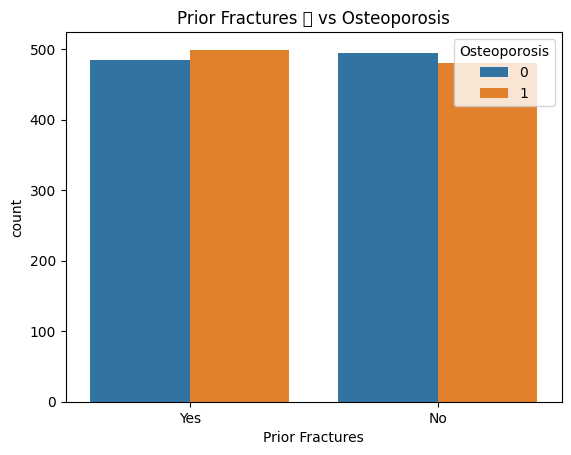

In [22]:
sns.countplot(x='Prior Fractures', data=df, hue='Osteoporosis').set_title('Prior Fractures 	 vs Osteoporosis')

In [23]:
cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    print(col,':',df[col].unique())

Gender : [0 1]
Hormonal Changes : [0 1]
Family History : [1 0]
Race/Ethnicity : [1 2 0]
Body Weight : [1 0]
Calcium Intake : [1 0]
Vitamin D Intake : [1 0]
Physical Activity : [1 0]
Smoking : [1 0]
Alcohol Consumption : [0 1]
Medical Conditions : [2 1 0]
Medications : [0 1]
Prior Fractures : [1 0]


<Axes: >

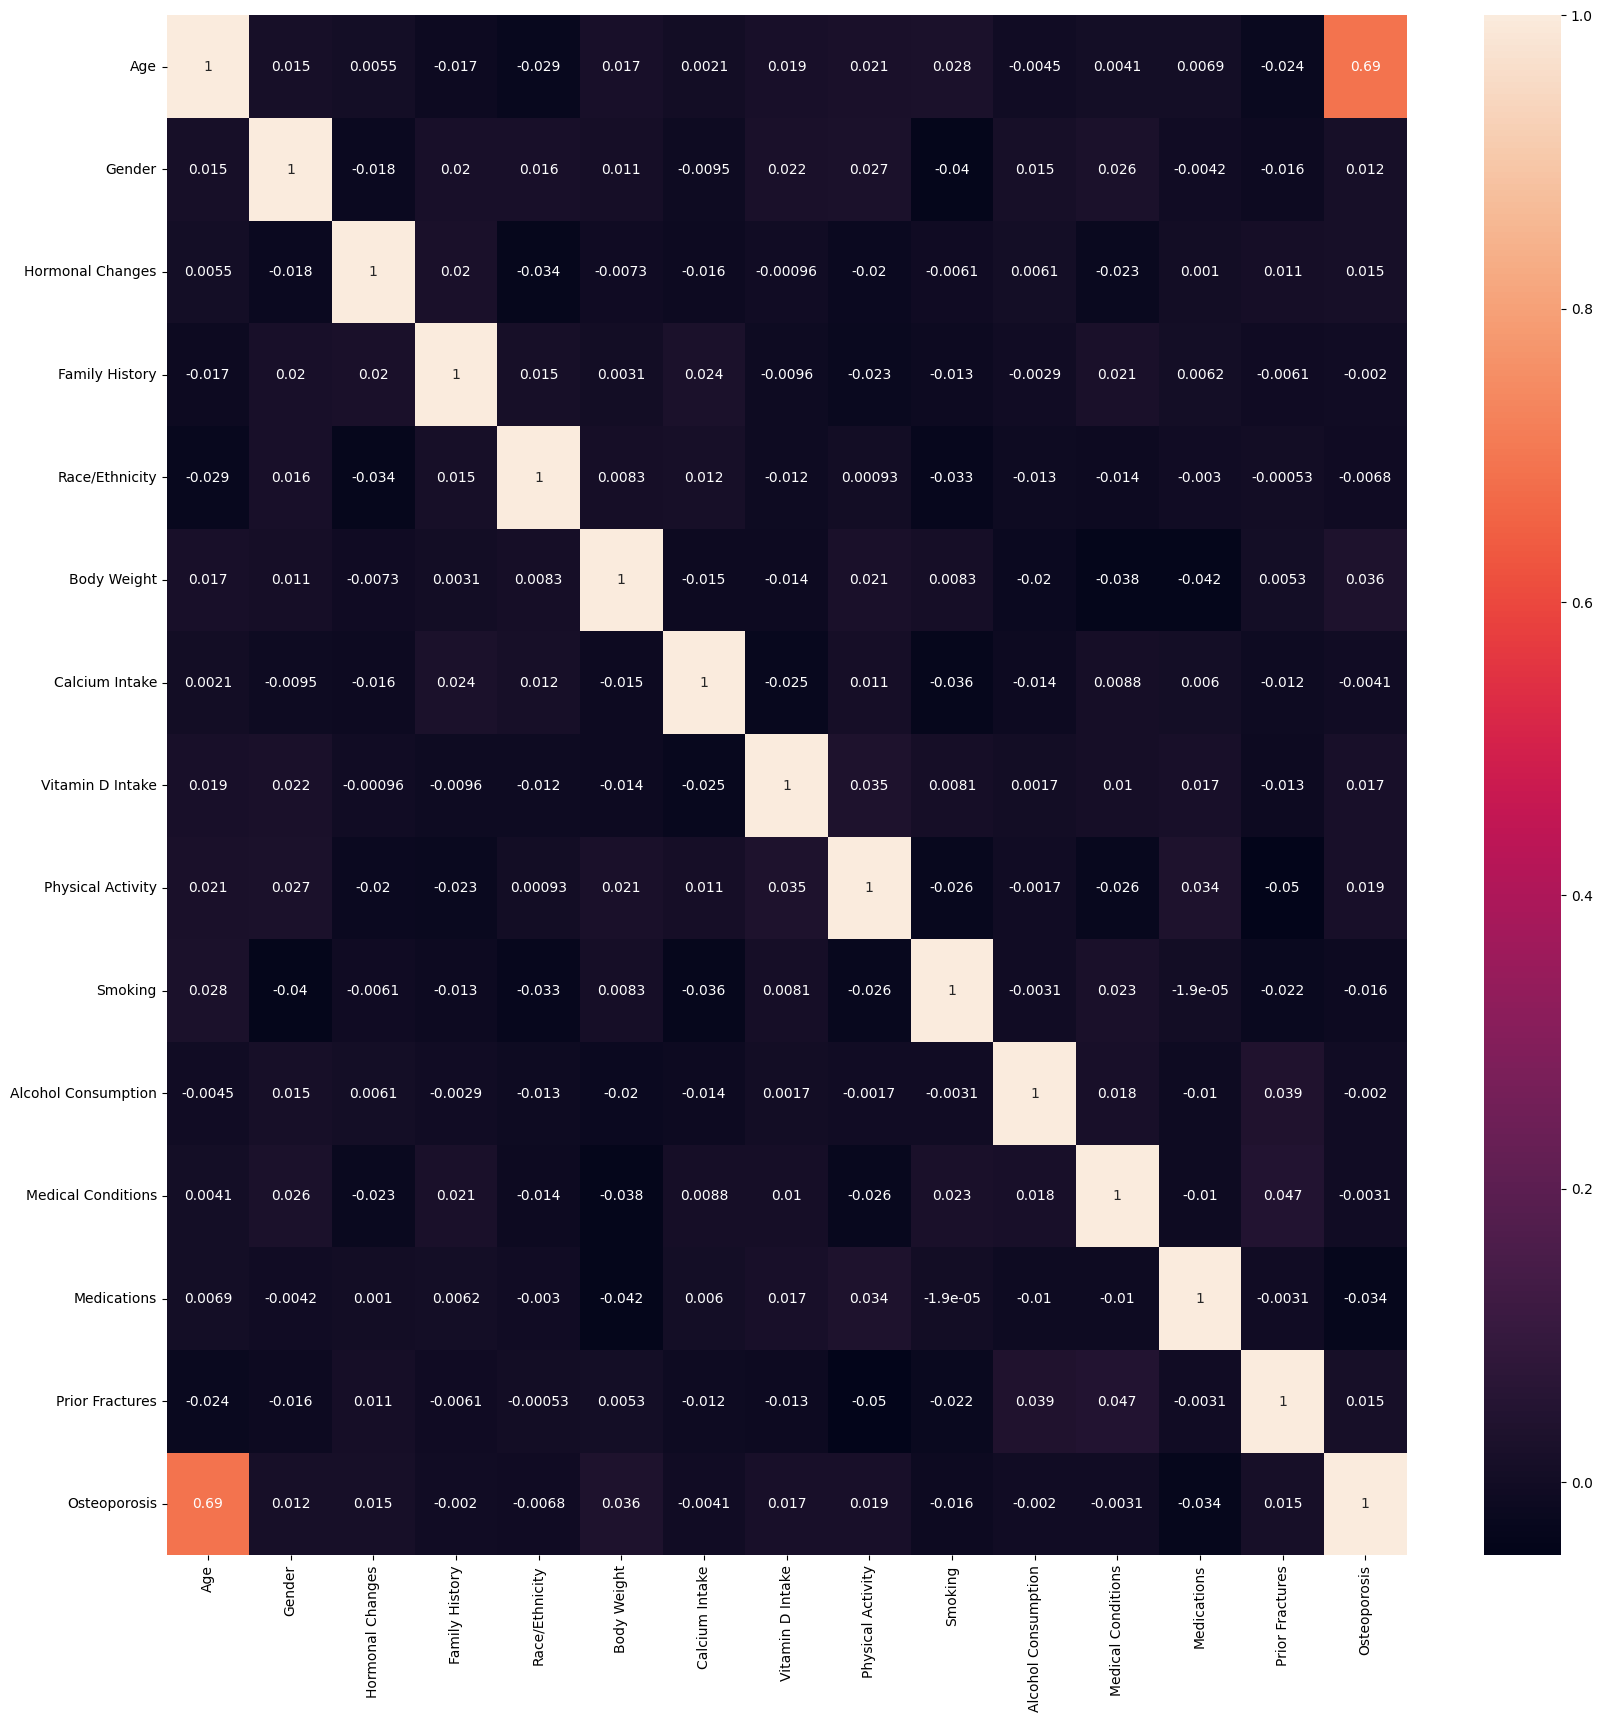

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [25]:
X = df.drop(columns='Osteoporosis', axis=1)
y = df['Osteoporosis']
X_train , X_test , y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
X_train , X_val ,y_train , y_val = train_test_split(X_train, y_train , test_size=0.2 , random_state=42)

In [26]:
logestic_model= LogisticRegression()
logestic_model.fit(X_train, y_train)

X_train_predict = logestic_model.predict(X_train)

training = accuracy_score(y_train, X_train_predict)

print(training)

0.8274760383386581


In [27]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.8498454183266932


In [28]:
model_rand = RandomForestClassifier(criterion='gini',n_estimators=250 , random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2)
model_rand.fit(X_train,y_train)
y_perd = model_rand.predict(X_test)
accuracy = accuracy_score(y_test,y_perd)
precision = precision_score(y_test,y_perd)
recall = recall_score(y_test,y_perd)
f1 = f1_score(y_test,y_perd)
score = model_rand.score(X_train,y_train)
print(f'Accuracy :  {accuracy:.2f}%')
print(f'precision :  {precision:.2f}%')
print(f'recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.84%
precision :  0.95%
recall :  0.73%
F1 score :  0.82%
score :  0.95%


13/13 [==============================] - 0s 1ms/step
Neural Network Accuracy with 1 layers and 16 neurons: 0.8163265306122449
13/13 [==============================] - 0s 2ms/step
Neural Network Accuracy with 1 layers and 32 neurons: 0.8392857142857143
13/13 [==============================] - 0s 1ms/step
Neural Network Accuracy with 1 layers and 64 neurons: 0.8214285714285714
13/13 [==============================] - 0s 2ms/step
Neural Network Accuracy with 1 layers and 128 neurons: 0.798469387755102
13/13 [==============================] - 0s 1ms/step
Neural Network Accuracy with 2 layers and 16 neurons: 0.8367346938775511
13/13 [==============================] - 0s 2ms/step
Neural Network Accuracy with 2 layers and 32 neurons: 0.8061224489795918
13/13 [==============================] - 0s 1ms/step
Neural Network Accuracy with 2 layers and 64 neurons: 0.8086734693877551
13/13 [==============================] - 0s 1ms/step
Neural Network Accuracy with 2 layers and 128 neurons: 0.81122448

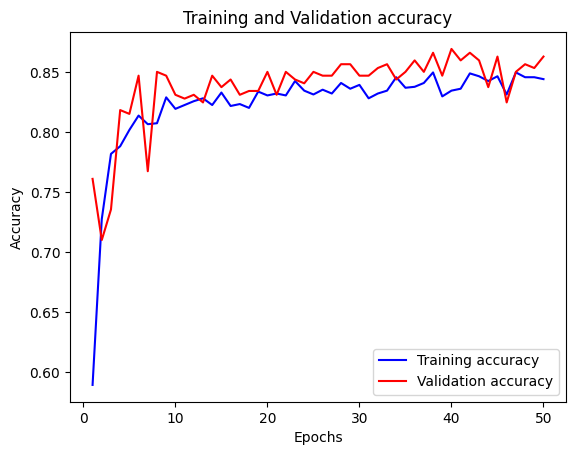

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Determine the number of hidden layers and neurons to test
hidden_layers = [1, 2, 3, 4]  # The number of hidden layers
neurons =[16, 32, 64, 128]  # The number of neurons in each layer

best_accuracy = 0
best_model = None

for num_layers in hidden_layers:
    for num_neurons in neurons:
        # creat model
        model = Sequential()
        model.add(Dense(num_neurons, activation='relu', input_shape=(X_train.shape[1],)))
        for _ in range(num_layers - 1):
            model.add(Dense(num_neurons, activation='relu'))
            model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))

        # compile model
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

        # train model
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        # metrics accuracy
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Neural Network Accuracy with {num_layers} layers and {num_neurons} neurons: {accuracy}")
        #save best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

print("Best Neural Network Accuracy:", best_accuracy)

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.81%
Precision :  0.81%
Recall :  0.81%
F1 score :  0.81%
score :  0.84%


In [31]:
param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 200}
best cross-validated accuracy:  0.9105466135458167


In [32]:
model = AdaBoostClassifier(n_estimators=200, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.91%
Precision :  0.92%
Recall :  0.91%
F1 score :  0.91%
score :  0.91%


In [33]:
!pip install catboost

In [34]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(n_estimators=300, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Learning rate set to 0.034205
0:	learn: 0.6559734	total: 48.8ms	remaining: 14.6s
1:	learn: 0.6326606	total: 49.8ms	remaining: 7.43s
2:	learn: 0.6090013	total: 51ms	remaining: 5.05s
3:	learn: 0.5879672	total: 52.2ms	remaining: 3.86s
4:	learn: 0.5617348	total: 53.2ms	remaining: 3.14s
5:	learn: 0.5430878	total: 54.7ms	remaining: 2.68s
6:	learn: 0.5224868	total: 56.2ms	remaining: 2.35s
7:	learn: 0.5010503	total: 57.5ms	remaining: 2.1s
8:	learn: 0.4851552	total: 58.9ms	remaining: 1.91s
9:	learn: 0.4692434	total: 60.4ms	remaining: 1.75s
10:	learn: 0.4540539	total: 61.9ms	remaining: 1.63s
11:	learn: 0.4415399	total: 63.4ms	remaining: 1.52s
12:	learn: 0.4309700	total: 65ms	remaining: 1.44s
13:	learn: 0.4192049	total: 66.4ms	remaining: 1.36s
14:	learn: 0.4079916	total: 67.4ms	remaining: 1.28s
15:	learn: 0.3995515	total: 68.4ms	remaining: 1.21s
16:	learn: 0.3901462	total: 69.9ms	remaining: 1.16s
17:	learn: 0.3798363	total: 71.4ms	remaining: 1.12s
18:	learn: 0.3744874	total: 72.8ms	remaining: 1.0

In [36]:
from xgboost import XGBClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 350}
best cross-validated accuracy:  0.882584860557769


In [37]:
model = XGBClassifier(n_estimators=350, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train,y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.87%
Precision :  0.87%
Recall :  0.87%
F1 score :  0.87%
score :  1.00%


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

grid search reasult:
best parameters :  {'n_estimators': 100}
best cross-validated accuracy:  0.9057561752988048


In [39]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train, y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

Accuracy :  0.90%
Precision :  0.91%
Recall :  0.90%
F1 score :  0.90%
score :  0.92%


In [40]:
from lightgbm import LGBMClassifier

param_grid = {'n_estimators': [100,200,250,300,350,400,500]}
model_rand = LGBMClassifier(random_state=42)
grid_search = GridSearchCV(model_rand,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
print('grid search reasult:')
print('best parameters : ', grid_search.best_params_)
print('best cross-validated accuracy: ',grid_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 492, number of negative: 509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1001, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491508 -> initscore=-0.033969
[LightGBM] [Info] Start training from score -0.033969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [41]:
model = LGBMClassifier(n_estimators=100,  random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
score = model.score(X_train, y_train)

print(f'Accuracy :  {accuracy:.2f}%')
print(f'Precision :  {precision:.2f}%')
print(f'Recall :  {recall:.2f}%')
print(f'F1 score :  {f1:.2f}%')
print(f'score :  {score:.2f}%')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 616, number of negative: 636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 1252, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492013 -> initscore=-0.031952
[LightGBM] [Info] Start training from score -0.031952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy :  0.89%
Precision :  0.89%
Recall :  0.89%
F1 score :  0.88%
score :  0.99%


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 616, number of negative: 636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 1252, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492013 -> initscore=-0.031952
[LightGBM] [Info] Start training from score -0.031952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


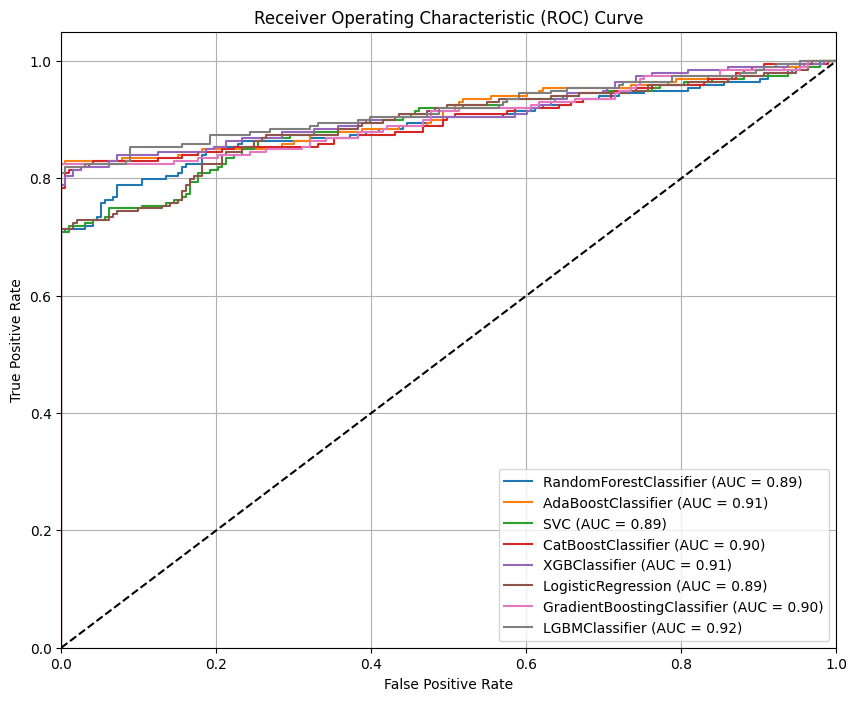

In [42]:
from sklearn.metrics import roc_curve, auc

models = [
    RandomForestClassifier(criterion='gini',n_estimators=250 , random_state=42, max_depth=10, min_samples_leaf=2, min_samples_split=2),
    AdaBoostClassifier(n_estimators=200, random_state=42),
    SVC(kernel='linear', probability=True, random_state=42),
    CatBoostClassifier(n_estimators=300, random_state=42, verbose=False),
    XGBClassifier(n_estimators=350, random_state=42),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    LGBMClassifier(n_estimators=100,  random_state=42)


]
# Plot ROC curve for each model

plt.figure(figsize=(10, 8))
for model in models:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (type(model).__name__, roc_auc))

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show();